In [5]:
import pandas as pd


In [6]:
# constants:

DATA_PATH = '../data/spotify_data.csv'

In [7]:
df = pd.read_csv(DATA_PATH)

# Vamos a analizar la composición de los datos:

Veamos la composición y distribución de los datos para ciertas columnas con las cuales queremos trabajar. 
La idea en este punto es entender si la distribución tiene suficiente varianza como para dar una explicación sobre los datos.

<Axes: >

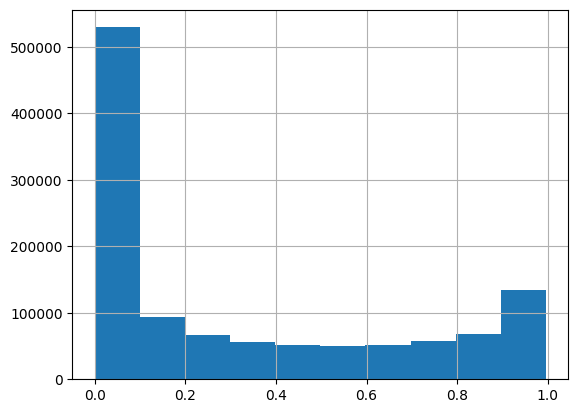

In [11]:
df['acousticness'].hist()

<Axes: >

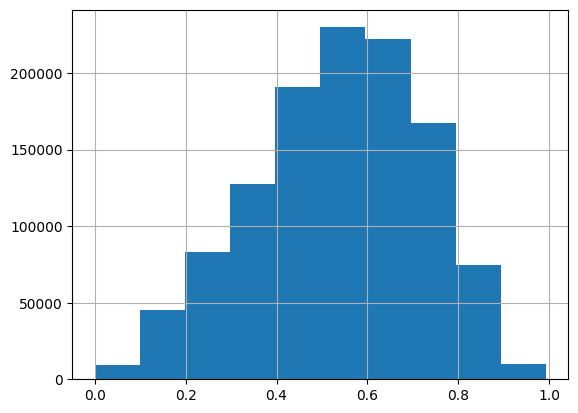

In [12]:
df['danceability'].hist()

<Axes: >

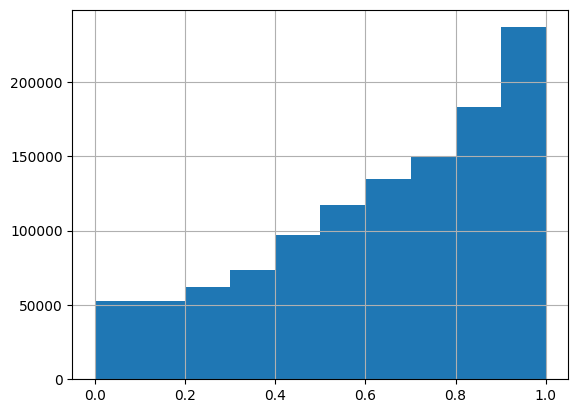

In [16]:
df['energy'].hist()

# Principal Component Analysis:
Ahora utilizaremos una tecnica conocida como PCA (por sus siglas en ingles) para determinar la importancia de las vairables que nos interesan utilizar.

                       PC0       PC1       PC2       PC3       PC4       PC5  \
acousticness      0.497914  0.237585 -0.242042 -0.027302 -0.175743 -0.054231   
danceability     -0.208851 -0.131843 -0.715400 -0.013946  0.428215 -0.487394   
energy           -0.554837 -0.039334  0.251602  0.026652  0.106544  0.082537   
instrumentalness  0.263561 -0.280306  0.464697  0.163840  0.694588 -0.146035   
liveness         -0.123798  0.648455  0.329322  0.039343 -0.055575 -0.665657   
key              -0.036424 -0.034257 -0.100147  0.979588 -0.166799 -0.003736   
loudness         -0.553314 -0.080079 -0.016455 -0.055379 -0.152834  0.043677   
speechiness      -0.091350  0.646508 -0.177817  0.085433  0.487518  0.535114   

                       PC6       PC7  
acousticness     -0.720879  0.287771  
danceability      0.015794  0.076399  
energy           -0.214487  0.749951  
instrumentalness -0.289541 -0.146851  
liveness          0.050257 -0.073933  
key              -0.001483 -0.006275  
loudne

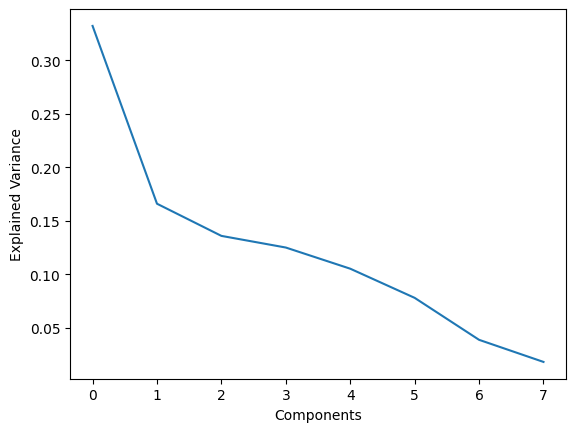

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plot
df_prev = df
df = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'key', 'loudness', 'speechiness']]
# Normalizamos la data a valores [0; 1]
df_normalized=(df - df.mean()) / df.std()
pca = PCA(n_components=df.shape[1])
pca.fit(df_normalized)


# Creamos una matrix transpuesta y visualizamos
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
index=df.columns)
print(loadings)

plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()

In [10]:
df_normalized

,acousticness,danceability,energy,instrumentalness,liveness,key,loudness,speechiness
0,1.049229,-0.295093,-1.244617,-0.691228,-0.537218,-0.362224,-0.189477,-0.393523
1,0.437940,0.187349,-0.686393,-0.691191,-0.624750,-0.643503,-0.229602,-0.528337
2,0.046376,-0.696225,-1.499699,-0.691091,-0.664039,-0.643503,-0.832360,-0.477092
3,1.367551,-0.788377,-1.436853,-0.691228,-0.712778,1.325446,-0.151991,-0.445556
4,-0.701256,-0.582390,0.559444,-0.638362,-0.562085,0.200333,0.626930,-0.493648
...,...,...,...,...,...,...,...,...
1159759,0.009755,-0.891370,0.378299,-0.690842,-0.318390,1.325446,0.444959,-0.151487
1159760,1.314028,-0.116210,0.130610,-0.690875,-0.462618,0.481611,0.245213,-0.474727
1159761,0.437940,-0.251728,-0.738149,-0.682655,-0.643649,-0.080946,0.082600,-0.515723
1159762,0.308358,-0.311355,-0.867538,-0.691055,-0.487485,-1.487338,-0.767596,-0.514146


In [11]:
# veamos como se comporta con un ejemplo de similaridad.

from sklearn.metrics.pairwise import cosine_similarity
result = cosine_similarity(df_normalized,df_normalized.iloc[0].to_numpy().reshape((1, -1)))

for idx in result.argsort(axis=0)[::-1][:6]:
    print(df_prev.iloc[idx][['artist_name', 'track_name']])


  artist_name       track_name
0  Jason Mraz  I Won't Give Up
       artist_name track_name
357285    Belchior    Populus
            artist_name           track_name
1055936  Elvis Costello  How Deep Is the Red
          artist_name                                   track_name
465958  Hank Williams  From Jerusalem To Jericho - 2019 - Remaster
            artist_name              track_name
615200  Enrique Linares  He Sabido Que Te Amaba
         artist_name               track_name
569976  Amaal Mallik  Tujhe Chaahta Hoon Kyun


/var/folders/y6/46j_vqhj6_s8zd5x123t_x6w0000gn/T/ipykernel_33132/1178479022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux['label'] = [False for _ in range(len(aux))]


,idx,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,label
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,...,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4,False
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,...,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4,False
6,6,Matt Wertz,Walking in a Winter Wonderland,0BP7hSvLAG3URGrEvNNbGM,48,2012,acoustic,0.575,0.606,9,...,1,0.0300,0.0119,0.000000,0.0675,0.364,121.083,152307,4,False
7,7,Green River Ordinance,Dancing Shoes,3Y6BuzQCg9p4yH347Nn8OW,45,2012,acoustic,0.586,0.423,7,...,1,0.0261,0.2520,0.000006,0.0976,0.318,138.133,232373,4,False
